In [149]:
#small dataset
import numpy as np  
import pandas as pd

usptodata = pd.read_csv('U.S. Patents.csv')
usptodataset=usptodata[["grant_id","claims_text","abstract"]]
usptodataset= usptodata.dropna()
US_Patent_df = usptodataset.reset_index(drop=True)
US_Patent_df= US_Patent_df[['grant_id','abstract']]
US_Patent_df

,grant_id,abstract
0,USPP030977,"A new and distinct variety of Mango plant, her..."
1,USPP030978,&#x2018;Honeysuckle Rose #1-6&#x2019; is a new...
2,USPP030979,"A new and distinct peach tree variety, <i>Prun..."
3,USPP030980,This invention relates to a new and distinct v...
4,USPP030981,A new and distinct cultivar of Strawberry plan...
...,...,...
7008,US10462947,Provided are a first component holding tool op...
7009,US10462948,In a case in which mounting deviation is occur...
7010,US10462949,A reel holding device is provided. The device ...
7011,US10462950,An electronic component bonding device include...


In [150]:
def cleantext(df): 
    
    US_Patent_df['cleaned_text'] = US_Patent_df['abstract'].replace(r'\'|\"|\,|\.|\?|\+|\-|\/|\=|\(|\)|\n|"', '', regex=True)
    
    # convert to lowercase
    US_Patent_df['cleaned_text'] = US_Patent_df['cleaned_text'].str.lower()
    
    #remove numbers
    US_Patent_df['cleaned_text'] =US_Patent_df['cleaned_text'].replace(r'\d+', '', regex = True)
        
    #remove_symbols
    US_Patent_df['cleaned_text']  = US_Patent_df['cleaned_text'].replace(r'[^a-zA-Z0-9]', " ", regex=True)
    
    #remove punctuations 
    US_Patent_df['cleaned_text'] = US_Patent_df['cleaned_text'].replace(r'[[]!"#$%\'()\*+,-./:;<=>?^_`{|}]+',"", regex = True)
    
    #remove_URL(x):
    US_Patent_df['cleaned_text']  = US_Patent_df['cleaned_text'].replace(r'https.*$', "", regex = True)
    US_Patent_df['cleaned_text'] = US_Patent_df['cleaned_text'].replace("   ", " ", regex = True)
    US_Patent_df['cleaned_text'] = US_Patent_df['cleaned_text'].replace("  ", " ", regex = True)
   
    return US_Patent_df

df = cleantext(US_Patent_df)

In [151]:
df['abstract'][0]

'A new and distinct variety of Mango plant, herein referred to by its cultivar name, &#x2018;NMBP-1201&#x2019;, is provided which forms fruit with an average weight of 361 grams with skin that is soft red to dark red blush over a yellow background in coloration. The new variety is an early to mid-season variety.'

In [152]:
df['cleaned_text'][0]

'a new and distinct variety of mango plant herein referred to by its cultivar name x nmbp x is provided which forms fruit with an average weight of grams with skin that is soft red to dark red blush over a yellow background in coloration the new variety is an early to midseason variety'

In [153]:
df['abstract'][1]

'&#x2018;Honeysuckle Rose #1-6&#x2019; is a new variety derived from &#x2018;Simmons Gala&#x2019; characterized by a unique red tint extending into the flesh and a combination of crispness, a thick fruit skin, long stem, resistance to early fruit drop, resistance to fire blight, and late ripening.'

In [154]:
df['cleaned_text'][1]

' x honeysuckle rose x is a new variety derived from x simmons gala x characterized by a unique red tint extending into the flesh and a combination of crispness a thick fruit skin long stem resistance to early fruit drop resistance to fire blight and late ripening'

In [155]:
#remove stopwords and words_to_remove
import nltk
stopwords = nltk.corpus.stopwords.words('english')
df['cleaned_text_without_Stopwprd'] = df['cleaned_text'].apply(lambda x: ' '.join([word for word in str(x).split() if word not in stopwords]))
df

,grant_id,abstract,cleaned_text,cleaned_text_without_Stopwprd
0,USPP030977,"A new and distinct variety of Mango plant, her...",a new and distinct variety of mango plant here...,new distinct variety mango plant herein referr...
1,USPP030978,&#x2018;Honeysuckle Rose #1-6&#x2019; is a new...,x honeysuckle rose x is a new variety derived...,x honeysuckle rose x new variety derived x sim...
2,USPP030979,"A new and distinct peach tree variety, <i>Prun...",a new and distinct peach tree variety i prunus...,new distinct peach tree variety prunus persica...
3,USPP030980,This invention relates to a new and distinct v...,this invention relates to a new and distinct v...,invention relates new distinct variety red ras...
4,USPP030981,A new and distinct cultivar of Strawberry plan...,a new and distinct cultivar of strawberry plan...,new distinct cultivar strawberry plant named x...
...,...,...,...,...
7008,US10462947,Provided are a first component holding tool op...,provided are a first component holding tool op...,provided first component holding tool operatin...
7009,US10462948,In a case in which mounting deviation is occur...,in a case in which mounting deviation is occur...,case mounting deviation occurring component mo...
7010,US10462949,A reel holding device is provided. The device ...,a reel holding device is provided the device i...,reel holding device provided device includes c...
7011,US10462950,An electronic component bonding device include...,an electronic component bonding device include...,electronic component bonding device includes m...


In [156]:
print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [157]:
df['cleaned_text_without_Stopwprd'][1]

'x honeysuckle rose x new variety derived x simmons gala x characterized unique red tint extending flesh combination crispness thick fruit skin long stem resistance early fruit drop resistance fire blight late ripening'

In [158]:
#stemming
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
def stem_words(text):
    return " ".join([stemmer.stem(word) for word in text.split()])
df["Stemming"] = df["cleaned_text_without_Stopwprd"].apply(lambda x: stem_words(x))

In [159]:
df["Stemming"][0]

'new distinct varieti mango plant herein refer cultivar name x nmbp x provid form fruit averag weight gram skin soft red dark red blush yellow background color new varieti earli midseason varieti'

In [160]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])
df["Lemmatization"] = df["cleaned_text_without_Stopwprd"].apply(lambda text: lemmatize_words(text))

In [161]:
df["Lemmatization"][1]

'x honeysuckle rose x new variety derived x simmons gala x characterized unique red tint extending flesh combination crispness thick fruit skin long stem resistance early fruit drop resistance fire blight late ripening'

In [164]:
df["preprocessed_Abstract"] = df["Lemmatization"].apply(lambda n: len(n.split()))
df["Origin_Abstract"] = df["abstract"].apply(lambda n: len(n.split()))
df.head()

,grant_id,abstract,cleaned_text,cleaned_text_without_Stopwprd,Stemming,Lemmatization,preprocessed_Abstract,Origin_Abstract
0,USPP030977,"A new and distinct variety of Mango plant, her...",a new and distinct variety of mango plant here...,new distinct variety mango plant herein referr...,new distinct varieti mango plant herein refer ...,new distinct variety mango plant herein referr...,32,53
1,USPP030978,&#x2018;Honeysuckle Rose #1-6&#x2019; is a new...,x honeysuckle rose x is a new variety derived...,x honeysuckle rose x new variety derived x sim...,x honeysuckl rose x new varieti deriv x simmon...,x honeysuckle rose x new variety derived x sim...,33,44
2,USPP030979,"A new and distinct peach tree variety, <i>Prun...",a new and distinct peach tree variety i prunus...,new distinct peach tree variety prunus persica...,new distinct peach tree varieti prunu persica ...,new distinct peach tree variety prunus persica...,22,29
3,USPP030980,This invention relates to a new and distinct v...,this invention relates to a new and distinct v...,invention relates new distinct variety red ras...,invent relat new distinct varieti red raspberr...,invention relates new distinct variety red ras...,40,57
4,USPP030981,A new and distinct cultivar of Strawberry plan...,a new and distinct cultivar of strawberry plan...,new distinct cultivar strawberry plant named x...,new distinct cultivar strawberri plant name x ...,new distinct cultivar strawberry plant named x...,53,70


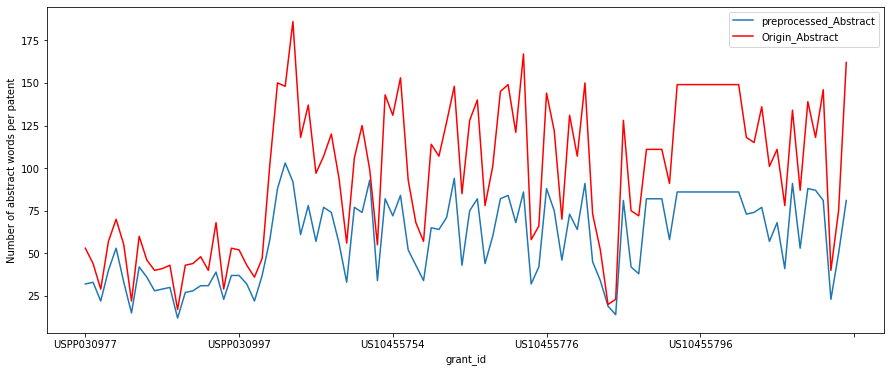

In [168]:
import matplotlib.pyplot as plt

# gca stands for 'get current axis'
ax = plt.gca()

df[:100].plot(kind='line',x='grant_id',y='preprocessed_Abstract',ax=ax, figsize=(15,6),  ylabel='Number of abstract words per patent')
df[:100].plot(kind='line',x='grant_id',y='Origin_Abstract', color='red', ax=ax,figsize=(15,6))

plt.show()